¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Videojuegos - Analisis de información

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Paso 2. Prepara los datos](#data_preprocessing1)
* [Paso 3. Analisis de datos](#data_preprocessing2) 
* [Paso 4. Creación de un perfil de usuario para cada región](#data_preprocessing3) 
* [Paso 5. Prueba de hipótesis](#hypothesis)
* [Paso 6. Conclusión general](#end)

<a id='intro'></a>
## Introducción

Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### Objetivo:
Prueba la hipótesis:
1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


### Etapas
Los datos de los videojuegos se almacenan en el archivo `/datasets/games.csv`. Tener presente que no hay ninguna información sobre la calidad de los datos, así que se realizara examinarlos antes de probar la hipótesis.

Primero, se evaluara la calidad de los datos y se establecera si los problemas son significativos. Entonces, durante el preprocesamiento de datos, se estableceran las acciones a emprender.

Tu proyecto consistirá en cinco etapas:
 1. Prepara los datos
 2. Analiza los datos
 3. Crea un perfil de usuario para cada región
 4. Prueba las siguientes hipótesis:

[Volver a Contenidos](#back)

# <a id='data_preprocessing1'></a>
## Paso 2. Prepara los datos

Abre los datos y examínalos.

In [1]:
# Importar pandas
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math as mt
from datetime import datetime
import math
import pandas

In [2]:
# Leer el archivo y almacenarlo en df
df = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [4]:
# Bucle en los encabezados poniendo todo en minúsculas
new_col_names = []

for info in df.columns:
    minus = info.lower() # Pone todas las letras en minúsculas
    new_col_names.append(minus) # Agrega el nuevo nombre a la lista de nuevos nombres de columna

# Reemplaza los nombres anteriores por los nuevos
df.columns = new_col_names
print(df.columns)
display(df)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Convierte los datos en los tipos necesarios.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df['year_of_release'] = df['year_of_release'].fillna(1970) #devolvera valores nulos NaN por un valor que le asignemos
df['year_of_release'] = df['year_of_release'].astype('int') #convertir la variable a entero
df['critic_score'] = df['critic_score'].fillna(0) #evolvera valores nulos NaN por un valor que le asignemos
df['critic_score'] = df['critic_score'].astype('float') #convertir la variable a float
df['user_score'] = df['user_score'].fillna(0) #devolvera valores nulos NaN por un valor que le asignemos
df['user_score'] =df['user_score'].replace('tbd','0') #se reemplazan los valores tbd a 0
df['user_score'] = df['user_score'].astype('float') #convertir la variable a float
df['rating'] = df['rating'].fillna("RP") #devolvera valores nulos NaN por un valor que le asignemos
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,RP


### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

la columna 'year_of_release' se realiza su cambio de float a int, debido a que los datos que se presentan son años por lo cual es un numero entero, adicional se realiza el cambio de esta variable de los datos que no aparece se reemplaza por 1970, con el fin de focalizar todos los datos NaN en un rango en especifico esto debido a que se utilizara en los calculos posteriores.

### Si es necesario, elige la manera de tratar los valores ausentes: Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

- los valores de la columna de df['year_of_release'] se reemplazan de valores nulos NaN por un valor (0), esto debido a que se requieren realizar operaciones mas adelantes, y esto permitira dar claridad a los datos.

- los valores de la columna de df['critic_score'] se reemplazan de valores nulos NaN por un valor (0), esto debido a que se requieren realizar operaciones mas adelantes, establecer media de datos y tendencia de las categorias de juegos.

- los valores de la columna de df['user_score'] se reemplazan de valores nulos NaN por un valor (0), esto debido a que se requieren realizar operaciones mas adelantes, establecer media de datos y tendencia de las categorias de juegos.

- los valores de la columna de df['rating'] se reemplazan de valores nulos NaN por un valor (0), esto debido a que se requieren realizar operaciones mas adelantes, establecer media de datos y tendencia de las categorias de juegos.

### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

year_of_release
1970    10408.0
1980        0.0
1981        0.0
1982        0.0
1983        0.0
1984        0.0
1985       59.0
1986        0.0
1987        0.0
1988       64.0
1989        0.0
1990        0.0
1991        0.0
1992       85.0
1993        0.0
1994       69.0
1995        0.0
1996      719.0
1997     1450.0
1998     2291.0
1999     2955.0
2000     9917.0
2001    23281.0
2002    43292.0
2003    41056.0
2004    38930.0
2005    45077.0
2006    41750.0
2007    45797.0
2008    47122.0
2009    43978.0
2010    33741.0
2011    34346.0
2012    23428.0
2013    19459.0
2014    18548.0
2015    16396.0
2016    16972.0
Name: critic_score, dtype: float64

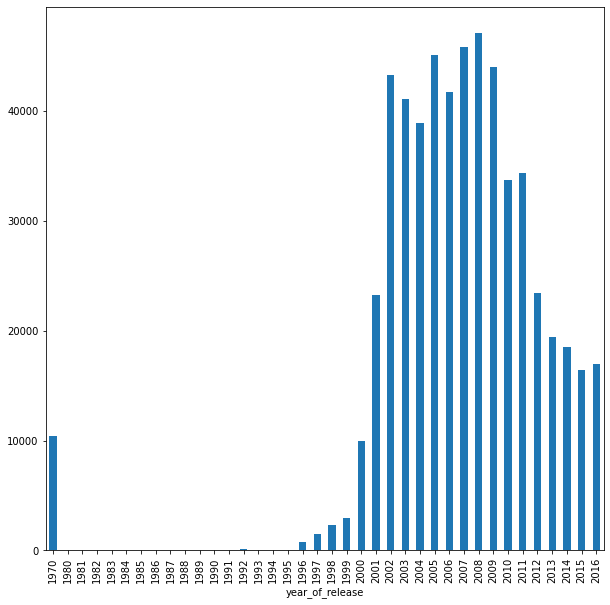

In [7]:
df1=df.groupby(by=["year_of_release"])['critic_score'].sum()
display(df1)

df1.plot(x='year_of_release', kind='bar', figsize=[10, 10])
plt.show()

Al tomar los datos de los fechas (años) vs las calificaciones de los criticos se presenta que desde 1980 a 1995 no se presentan datos de calificacion lo que indica los siguiente:
- No se presenta calificacion debido a la tecnologia de comunicacion.
- El mundo no estaba globalizado en conectores de comunicación, para este aspecto un factor crucial es el internet, como medio conector de información.
- No se contaba con canales de publicacion de información para proporcionar información.

### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

Para estos casos los datos TBD, se presentan en la columna de 'user_score' y estan enfocados a datos no capturados de manera correcta y esto se establece a lo siguiente:
1. Al realizar una agrupacion de datos consolidando por "year_of_release" versus el 'user_score' se valida que los datos son dispersos y no tienen una agrupacion de estos en un punto especifico.
2. Al realizar una agrupacion de datos consolidando por "platform" versus el 'user_score' se valida que los datos son dispersos y no tienen una agrupacion de estos en una plataforma en especifica, donde se pueda establecer la novedad.
3. Al realizar una agrupacion de datos consolidando por "genre" versus el 'user_score' se valida que los datos son dispersos y no tienen una agrupacion de estos en un genero en especifica, donde se pueda establecer la novedad.

Con base en esta informacion los datos "TBD" se manejara como valor "0", lo cual al realizar un comparativo con la muestra total representa a 2424 datos y su participacion en los datos globales es de 13%, definiendo esto se manejara como "0" para establecer datos y continuar con el tratamiento de datos.

In [8]:
df2=(df[df['user_score']=="tbd"])#se escoge un valor de muestra para comprobacion
df3=df2.groupby(by=["year_of_release"])['user_score'].count()
df4=df2.groupby(by=["platform"])['user_score'].count()
df5=df2.groupby(by=["genre"])['user_score'].count()
display(df3)
print()
display(df4)
print()
display(df5)
df2.info()


Series([], Name: user_score, dtype: int64)

Series([], Name: user_score, dtype: int64)

Series([], Name: user_score, dtype: int64)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             0 non-null      object 
 1   platform         0 non-null      object 
 2   year_of_release  0 non-null      int64  
 3   genre            0 non-null      object 
 4   na_sales         0 non-null      float64
 5   eu_sales         0 non-null      float64
 6   jp_sales         0 non-null      float64
 7   other_sales      0 non-null      float64
 8   critic_score     0 non-null      float64
 9   user_score       0 non-null      float64
 10  rating           0 non-null      object 
dtypes: float64(6), int64(1), object(4)
memory usage: 0.0+ bytes


### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [9]:
#display(df)
#df4=df.groupby(by=["year_of_release"])['critic_score'].count()
#display(df4)

In [10]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']+ df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01


In [11]:
#print(df['platform'].unique()) #Este método devuelve todos los valores únicos en una columna especificada.
#print()
#print(df['genre'].unique()) #Este método devuelve todos los valores únicos en una columna especificada.

#print(df.isnull().sum()) #Este método devuelve todos los valores únicos en una columna especificada.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Gustavo! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

[Volver a Contenidos](#back)

# <a id='data_preprocessing2'></a>
## Paso 3. Analisis de datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

,year_of_release
year_of_release,
1970,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


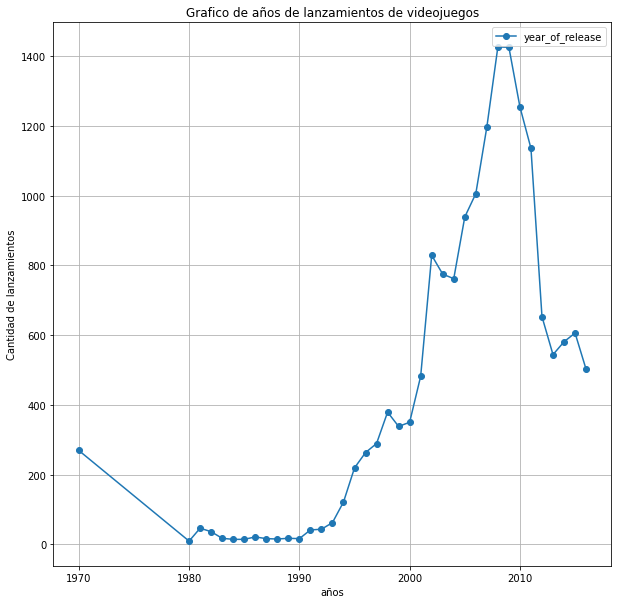

In [12]:
#df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

#df.info()
ef1=df.groupby(by=["year_of_release"])["year_of_release"].count()
ef1=pd.DataFrame(ef1)
display(ef1)
ef1.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='Grafico de años de lanzamientos de videojuegos', # se define el titulo del grafico
        marker='o',      # se define el estilo del grafico
        xlabel="años",   # se define leyenda del eje x esta es una opcion
        ylabel="Cantidad de lanzamientos",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[10, 10]          # se define tamaño de la grafica
)
plt.show()

Se realizar el grafico de comportamiento de lanzamientos de videojuegos vs los años se tienen los siguientes datos:
1. se presenta un 1.6% de los datos que tienen un error ya que no cuentan con un año establecido de lanzamiento, por defecto y para su control este fue agrupado con el año de 1970, lo que equivale a 269 datos.
2. Visualmente y graficando los datos se evidencia que ya los datos que cuentan con un año de lanzamiento definido se evidencia el crecimiento que presenta los videojuegos lo cual su tendencia de 1980 a 1990 fue bajo pero despues empezo a subir teniendo un pico en los años 2008 y 2009, posteriormente empezo a descender la cantidad de juegos lanzados.

### Observa cómo varían las ventas de una plataforma a otra.

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


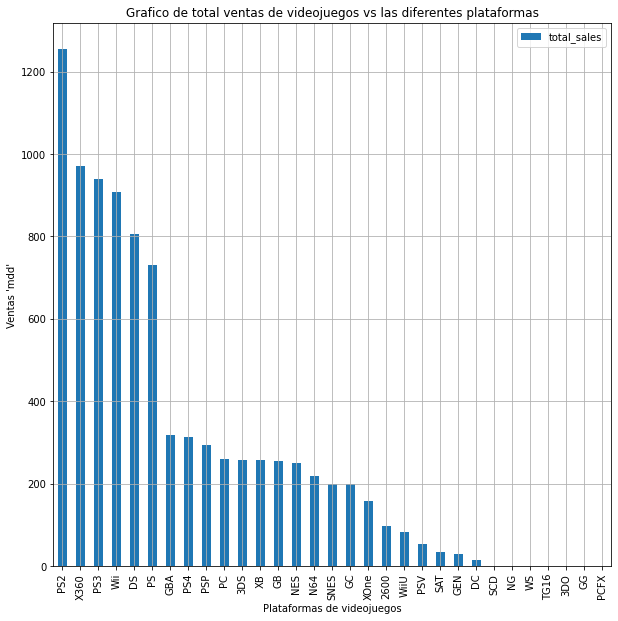

In [13]:
ef2=df.groupby(by=["platform"])['total_sales'].sum()
ef2=pd.DataFrame(ef2)
ef2=ef2.sort_values(by=['total_sales'], ascending = False)
display(ef2)
print()
ef2.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='Grafico de total ventas de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
        kind='bar',      # se define el estilo del grafico
        xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
        ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[10, 10]          # se define tamaño de la grafica
)
plt.show()

Se presenta un top 6 de plataformas que superan los 400 millones de dólares, en ventas totales a los largo de los años, presentando una amplia diferencia con respecto a las demas plataformas.

### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,0.0,0.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,0.0,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01


platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1970,3.34,3.28,22.21,8.31,16.33,10.18
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN


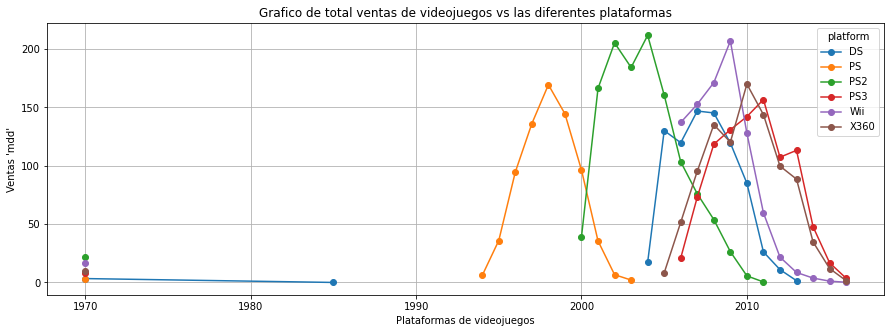

In [14]:
ef3= df[(df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']))]
display(ef3)
#ef3 = df.groupby(by=["platform", "year_of_release"])['total_sales'].sum()

pivot_data = ef3.pivot_table(index='year_of_release', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='platform', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='total_sales', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='sum' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
display(pivot_data)

pivot_data.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='Grafico de total ventas de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
        marker='o',      # se define el estilo del grafico
        xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
        ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[15, 5] ,
        legend=True #Sin leyenda.# se define tamaño de la grafica
)
plt.show()

Al realizar el analisis de las plataformas que han tenido las mayores ventas, se extraen y se verifica el comportamiento individual de cada una de ellas a lo largo de los años.

la visual que se presenta en cada uno de las plataformas es que inicial con ventas y porteriormente tienen un aumento consuderable en ventas pero una vez alcanzan el pico de ventas (la cual para cada una de ellas es en años diferentes posteriormente declinan y empiezan a disminuir sus ventas.

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [15]:
ef4 = df.reindex(['platform', 'year_of_release'], axis=1)
#display(ef4)
ef5 = ef4[ef4['year_of_release']>1970]
#display(ef5)

pivot_data2 = df.pivot_table(index='year_of_release', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='platform', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='total_sales', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='sum' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
#display(pivot_data2)

eff1 = (ef5[ef5['platform']=="PS2"]['year_of_release'].max())-(ef5[ef5['platform']=="PS2"]['year_of_release'].min())
eff2 = ef5[ef5['platform']=="X360"]['year_of_release'].max()-ef5[ef5['platform']=="X360"]['year_of_release'].min()
eff3 = ef5[ef5['platform']=="PS3"]['year_of_release'].max()-ef5[ef5['platform']=="PS3"]['year_of_release'].min()
eff4 = ef5[ef5['platform']=="Wii"]['year_of_release'].max()-ef5[ef5['platform']=="Wii"]['year_of_release'].min()
eff5 = ef5[ef5['platform']=="DS"]['year_of_release'].max()-ef5[ef5['platform']=="DS"]['year_of_release'].min()
eff6 = ef5[ef5['platform']=="PS"]['year_of_release'].max()-ef5[ef5['platform']=="PS"]['year_of_release'].min()
eff7 = ef5[ef5['platform']=="GBA"]['year_of_release'].max()-ef5[ef5['platform']=="GBA"]['year_of_release'].min()
eff8 = ef5[ef5['platform']=="PS4"]['year_of_release'].max()-ef5[ef5['platform']=="PS4"]['year_of_release'].min()
eff9 = ef5[ef5['platform']=="PSP"]['year_of_release'].max()-ef5[ef5['platform']=="PSP"]['year_of_release'].min()
eff10 = ef5[ef5['platform']=="PC"]['year_of_release'].max()-ef5[ef5['platform']=="PC"]['year_of_release'].min()
eff11 = ef5[ef5['platform']=="3DS"]['year_of_release'].max()-ef5[ef5['platform']=="3DS"]['year_of_release'].min()
eff11 = ef5[ef5['platform']=="XB"]['year_of_release'].max()-ef5[ef5['platform']=="XB"]['year_of_release'].min()
eff12 = ef5[ef5['platform']=="GB"]['year_of_release'].max()-ef5[ef5['platform']=="GB"]['year_of_release'].min()
eff13 = ef5[ef5['platform']=="NES"]['year_of_release'].max()-ef5[ef5['platform']=="NES"]['year_of_release'].min()
eff14 = ef5[ef5['platform']=="N64"]['year_of_release'].max()-ef5[ef5['platform']=="N64"]['year_of_release'].min()
eff15 = ef5[ef5['platform']=="SNES"]['year_of_release'].max()-ef5[ef5['platform']=="SNES"]['year_of_release'].min()
eff16 = ef5[ef5['platform']=="GC"]['year_of_release'].max()-ef5[ef5['platform']=="GC"]['year_of_release'].min()
eff17 = ef5[ef5['platform']=="XOne"]['year_of_release'].max()-ef5[ef5['platform']=="XOne"]['year_of_release'].min()
eff18 = ef5[ef5['platform']=="2600"]['year_of_release'].max()-ef5[ef5['platform']=="2600"]['year_of_release'].min()
eff19 = ef5[ef5['platform']=="WiiU"]['year_of_release'].max()-ef5[ef5['platform']=="WiiU"]['year_of_release'].min()
eff20 = ef5[ef5['platform']=="PSV"]['year_of_release'].max()-ef5[ef5['platform']=="PSV"]['year_of_release'].min()
eff21 = ef5[ef5['platform']=="SAT"]['year_of_release'].max()-ef5[ef5['platform']=="SAT"]['year_of_release'].min()
eff22 = ef5[ef5['platform']=="GEN"]['year_of_release'].max()-ef5[ef5['platform']=="GEN"]['year_of_release'].min()
eff23 = ef5[ef5['platform']=="DC"]['year_of_release'].max()-ef5[ef5['platform']=="DC"]['year_of_release'].min()
eff24 = ef5[ef5['platform']=="SCD"]['year_of_release'].max()-ef5[ef5['platform']=="SCD"]['year_of_release'].min()
eff25 = ef5[ef5['platform']=="NG"]['year_of_release'].max()-ef5[ef5['platform']=="NG"]['year_of_release'].min()
eff26 = ef5[ef5['platform']=="WS"]['year_of_release'].max()-ef5[ef5['platform']=="WS"]['year_of_release'].min()
eff27 = ef5[ef5['platform']=="TG16"]['year_of_release'].max()-ef5[ef5['platform']=="TG16"]['year_of_release'].min()
eff28 = ef5[ef5['platform']=="3DO"]['year_of_release'].max()-ef5[ef5['platform']=="3DO"]['year_of_release'].min()
eff29 = ef5[ef5['platform']=="GG"]['year_of_release'].max()-ef5[ef5['platform']=="GG"]['year_of_release'].min()
eff30 = ef5[ef5['platform']=="PCFX"]['year_of_release'].max()-ef5[ef5['platform']=="PCFX"]['year_of_release'].min()


ave_platform= (eff30+eff29+eff28+eff27+eff26+eff25+eff24+eff23+eff22+eff21+eff20+eff19+eff18+eff17+eff16+eff15+eff14+eff13+eff12+eff11+eff10+eff9+eff8+eff7+eff6+eff5+eff4+eff3+eff2+eff1)/30
print('Validando las diferentes plataformas en el tiempo, se determina que su permanencia tiene un promedio de: ', ave_platform, 'años')

Validando las diferentes plataformas en el tiempo, se determina que su permanencia tiene un promedio de:  7.7 años


### ¿Qué plataformas son líderes en ventas? 

In [16]:
print('Mayores ventas en el periodo comprendido de 1980 hasta 2016, teniendo presente que se incluyen los datos NaN, que fueron unificados con fecha de 1970')
display(ef2.head(6))
print()
ef6= df[df['year_of_release']==2016]
ef7=ef6.groupby(by=["platform"])['total_sales'].sum()
ef7=pd.DataFrame(ef7)
ef7=ef7.sort_values(by=['total_sales'], ascending = False)
print('Mayores ventas en el año 2016')

display(ef7.head(3))

Mayores ventas en el periodo comprendido de 1980 hasta 2016, teniendo presente que se incluyen los datos NaN, que fueron unificados con fecha de 1970


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86



Mayores ventas en el año 2016


,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14


### ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

<AxesSubplot:title={'center':'Grafico de total ventas de videojuegos vs las diferentes plataformas'}, xlabel='Plataformas de videojuegos', ylabel="Ventas 'mdd'">

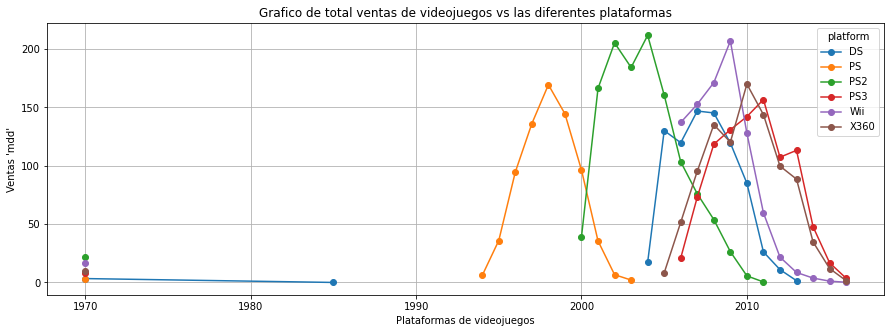

In [17]:
pivot_data.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='Grafico de total ventas de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
        marker='o',      # se define el estilo del grafico
        xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
        ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[15, 5] ,
        legend=True #Sin leyenda.# se define tamaño de la grafica
)

Se establecen las siguientes plataformas las cuales en el periodo comprendido de 1980 hasta 2016, presentan una mejor rentabilidad. En cada una de estas plataformas se establece como es su comportamiento, las cuales crecen alcanzando un minimo de 150 mdd, superando a las demas plataformas. Adicional como se observa en la grafica una vez las plataformas llegan a su pico mas alto en ventas comienza su proceso de reduccion de ventas, en donde se evidencia que en su proceso de reduccion estas plataformas desaparecen, lo cual todo esta enfocado a la renovacion tecnologica de los juegos donde en la reduccion de una plataforma nace una nueva plataforma en crecimiento. Aqui es donde se recomienda a las plataforma establecer estrategias y mecanismos para poder en el tiempo con renovacion de juegos que permita que el usuario no migre a otra plataforma.  

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

In [18]:
ef8= df[df['year_of_release']>1970]
#display(ef8)

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

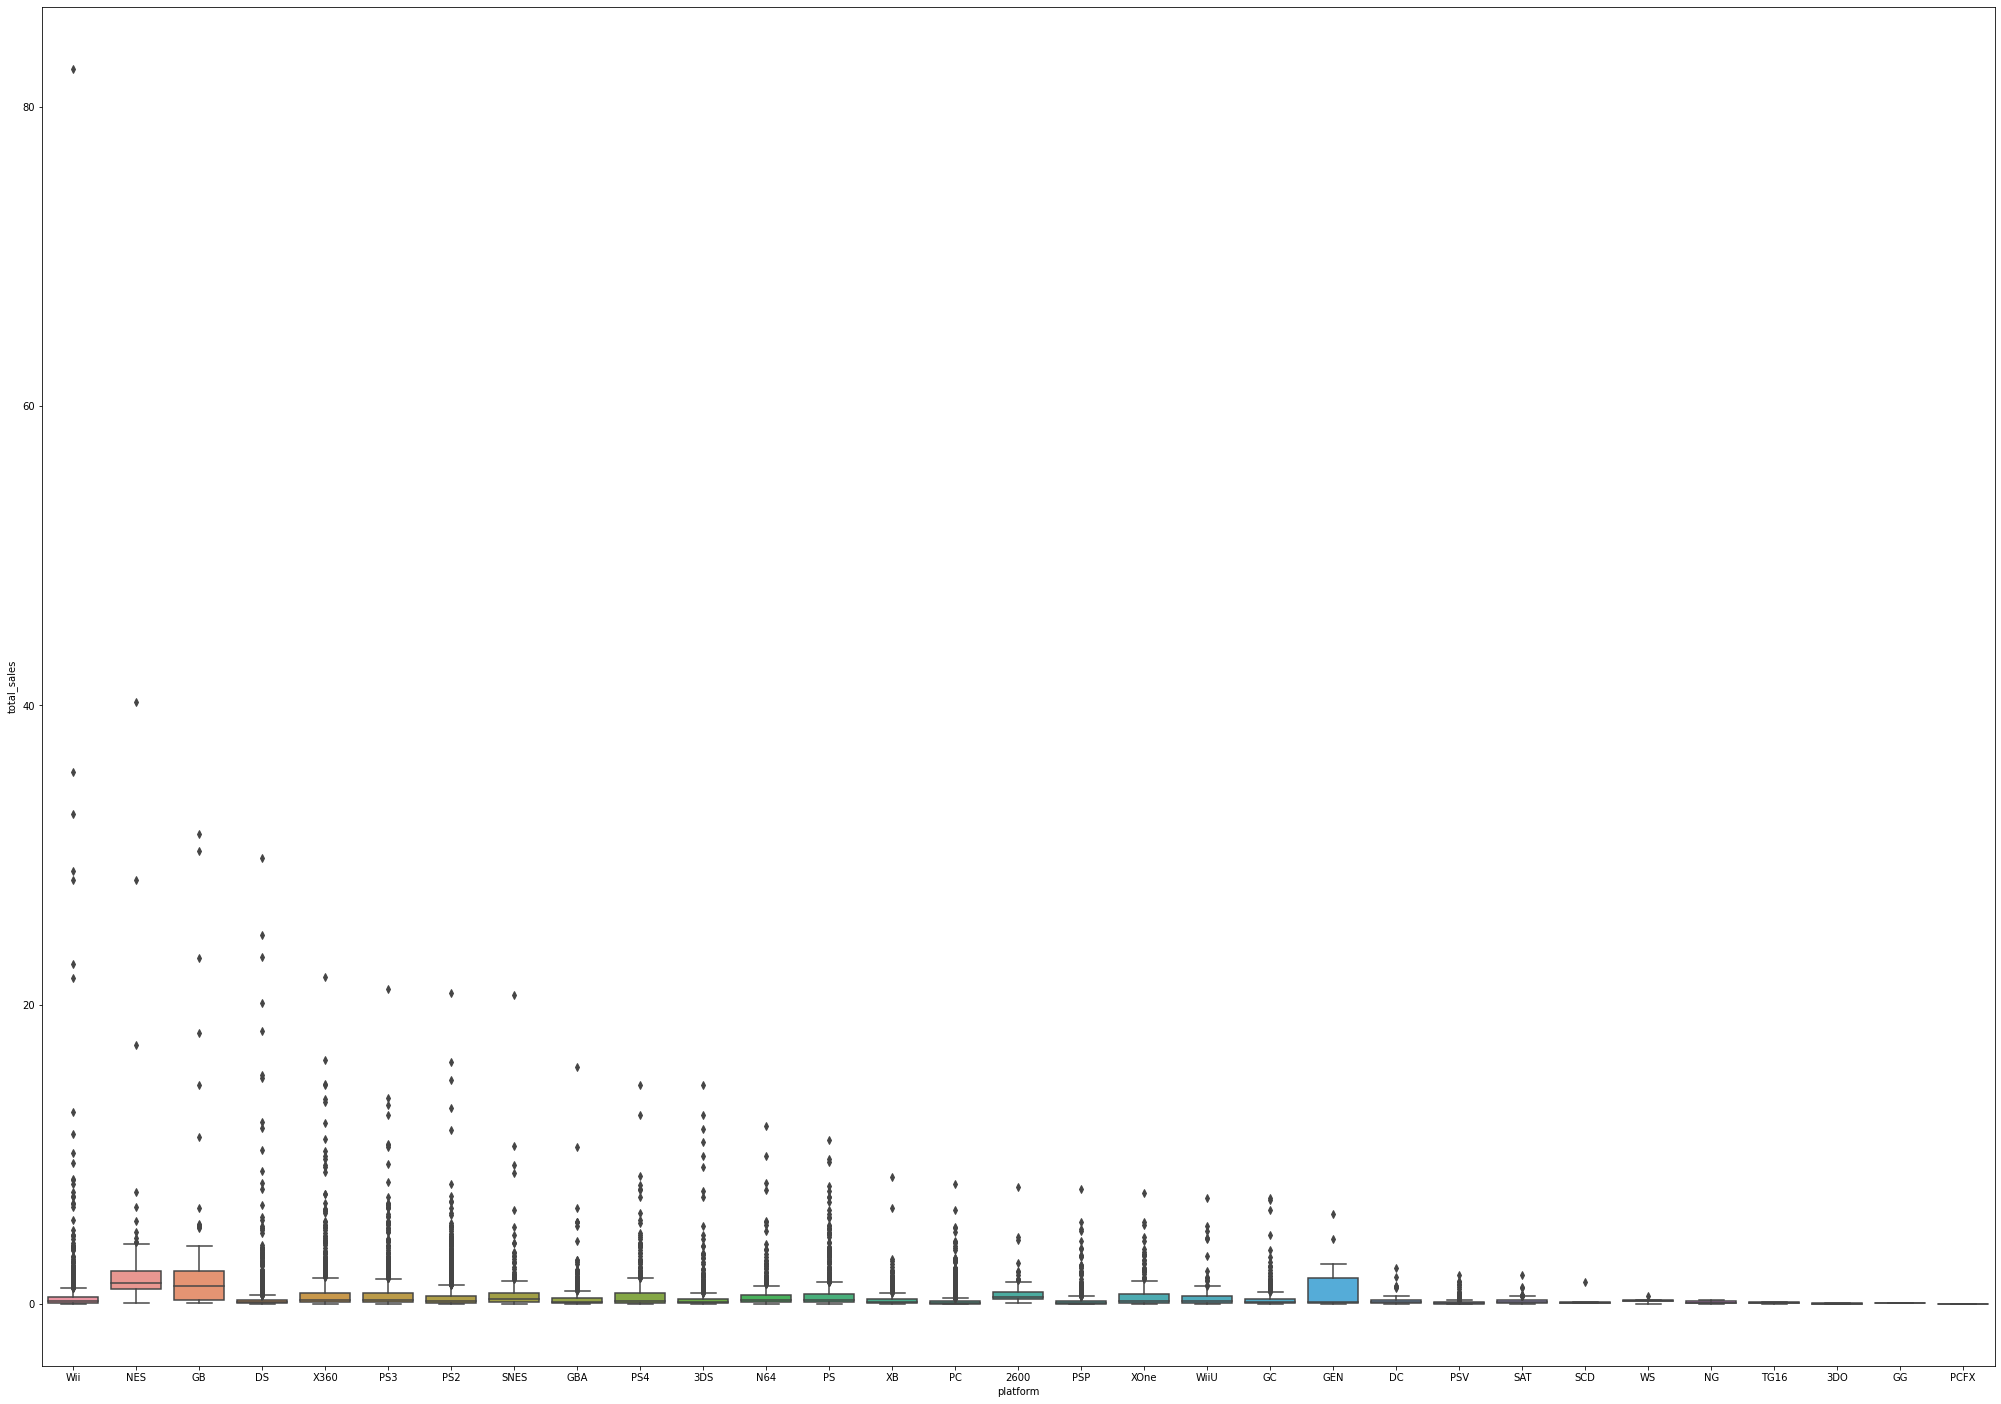

In [19]:
plt.figure(figsize=(35,25)) 
sns.boxplot(
    data= ef8,
    y='total_sales',
    x='platform'
)


### ¿Son significativas las diferencias en las ventas? 

Se evidencian mucho valores aberrantes o fuera de los limites, adicional se organizan los graficos de acuerdo a las ventas totales que tuvo cada plataforma en donde se puede ver que las medias de cada valores cambian, lo cual afecta la media de cada una de las plataformas, pero al comparar cada una de estas plataformas en este grafico si se evidencia una distribucion de los 50% de los datos en una misma franja, hay unas que sobresaltan mas que otras como son: NES, GB y GEN que son datos donde las cajas son mas amplias, las demas plataformas presentan una caja mucho mas compacta y si muchos valores dispersos.

### ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [20]:
efg1 = ef8[ef8['platform']=="PS2"]['total_sales'].mean()
efg2 = ef8[ef8['platform']=="X360"]['total_sales'].mean()
efg3 = ef8[ef8['platform']=="PS3"]['total_sales'].mean()
efg4 = ef8[ef8['platform']=="Wii"]['total_sales'].mean()
efg5 = ef8[ef8['platform']=="DS"]['total_sales'].mean()
efg6 = ef8[ef8['platform']=="PS"]['total_sales'].mean()
efg7 = ef8[ef8['platform']=="GBA"]['total_sales'].mean()
efg8 = ef8[ef8['platform']=="PS4"]['total_sales'].mean()
efg9 = ef8[ef8['platform']=="PSP"]['total_sales'].mean()
efg10 = ef8[ef8['platform']=="PC"]['total_sales'].mean()
efg11 = ef8[ef8['platform']=="3DS"]['total_sales'].mean()
efg11 = ef8[ef8['platform']=="XB"]['total_sales'].mean()
efg12 = ef8[ef8['platform']=="GB"]['total_sales'].mean()
efg13 = ef8[ef8['platform']=="NES"]['total_sales'].mean()
efg14 = ef8[ef8['platform']=="N64"]['total_sales'].mean()
efg15 = ef8[ef8['platform']=="SNES"]['total_sales'].mean()
efg16 = ef8[ef8['platform']=="GC"]['total_sales'].mean()
efg17 = ef8[ef8['platform']=="XOne"]['total_sales'].mean()
efg18 = ef8[ef8['platform']=="2600"]['total_sales'].mean()
efg19 = ef8[ef8['platform']=="WiiU"]['total_sales'].mean()
efg20 = ef8[ef8['platform']=="PSV"]['total_sales'].mean()
efg21 = ef8[ef8['platform']=="SAT"]['total_sales'].mean()
efg22 = ef8[ef8['platform']=="GEN"]['total_sales'].mean()
efg23 = ef8[ef8['platform']=="DC"]['total_sales'].mean()
efg24 = ef8[ef8['platform']=="SCD"]['total_sales'].mean()
efg25 = ef8[ef8['platform']=="NG"]['total_sales'].mean()
efg26 = ef8[ef8['platform']=="WS"]['total_sales'].mean()
efg27 = ef8[ef8['platform']=="TG16"]['total_sales'].mean()
efg28 = ef8[ef8['platform']=="3DO"]['total_sales'].mean()
efg29 = ef8[ef8['platform']=="GG"]['total_sales'].mean()
efg30 = ef8[ef8['platform']=="PCFX"]['total_sales'].mean()

av_efg = (efg1+efg2+efg3+efg4+efg5+efg6+efg7+efg8+efg9+efg10+efg11+efg12+efg13+efg14+efg15+efg16+efg17+efg18+efg19+efg20+efg21+efg22+efg23+efg24+efg25+efg26+efg27+efg28+efg29+efg30)/30

display(av_efg)

0.577606508352056

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 

'COMPARACION DE RESEÑAS DE USUARIOS Y PROFESIONALES VS LAS VENTAS EN LAS PLATAFORMAS'

<AxesSubplot:title={'center':'COMPARACION DE RESEÑAS DE USUARIOS Y PROFESIONALES VS LAS VENTAS EN LAS PLATAFORMAS'}, xlabel='Plataformas de videojuegos', ylabel="Ventas 'mdd'">

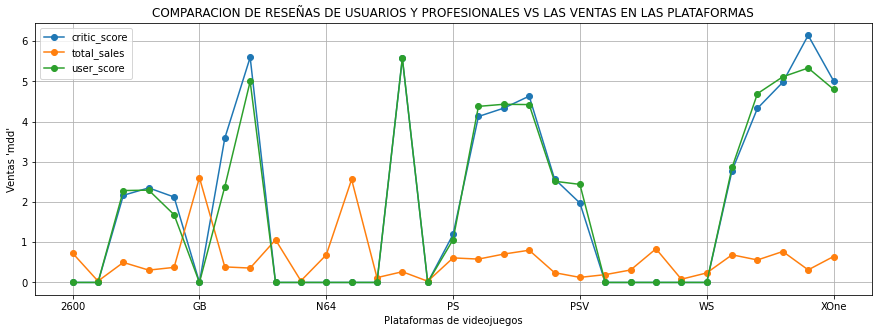

In [21]:
#display(df)

df['critic_score']=(df['critic_score'])/10
#display(df)

display("COMPARACION DE RESEÑAS DE USUARIOS Y PROFESIONALES VS LAS VENTAS EN LAS PLATAFORMAS")
efpivot = df.pivot_table(index='platform', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            #columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values=['total_sales', 'critic_score', 'user_score'], #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='mean' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )

#display(efpivot)

efpivot.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='COMPARACION DE RESEÑAS DE USUARIOS Y PROFESIONALES VS LAS VENTAS EN LAS PLATAFORMAS', # se define el titulo del grafico
        marker='o',      # se define el estilo del grafico
        xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
        ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[15, 5] ,
        legend=True #Sin leyenda.# se define tamaño de la grafica
)


Se realiza primero ajuste a la medida de 'critic_score' para dejarla en el mismo rango de calificacion de 1 a 10.
Despues se realiza un promedio de las ventas en comparacion las criticas de usuarios y profesionales, donde se establece lo siguiente:

    - Se establece que entre mayores son las criticas de los usuarios menores ventas percibe la plataforma y esta relacion tambien se presenta referente a las criticas de profesionales donde se establece lo mismo entre menores criticas tenga la plataforma, mayor dinero recibira la plataforma.

### Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

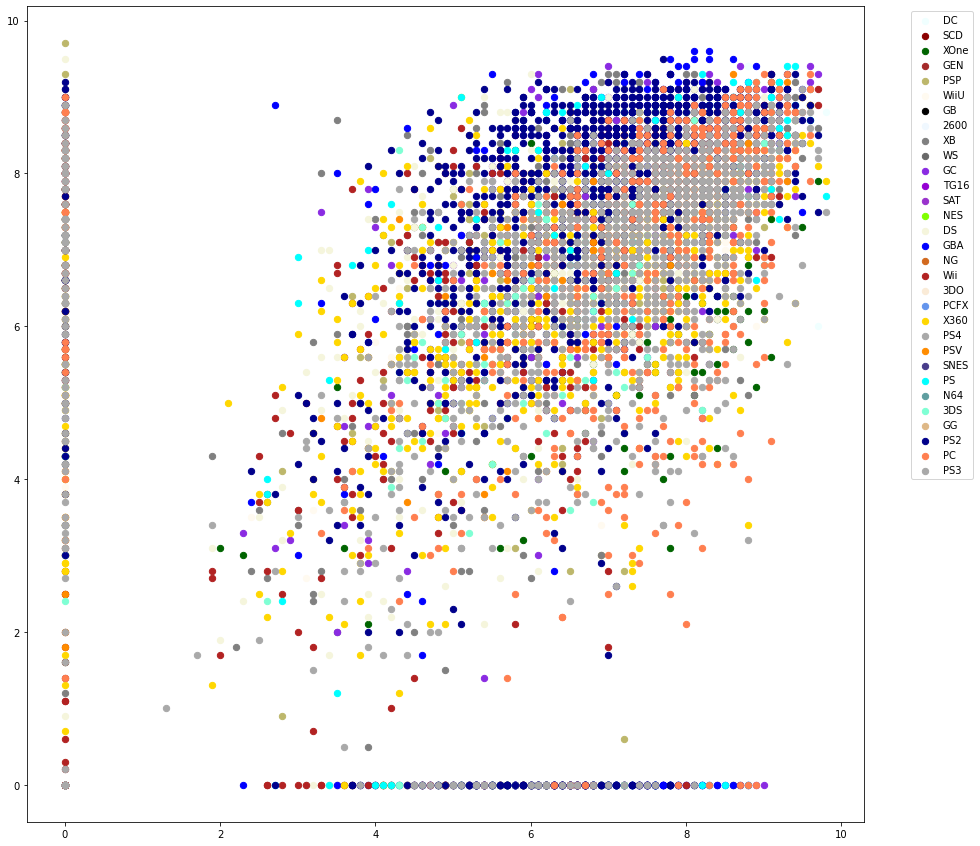

In [22]:
#display(df)
set(df.platform)

colors = {'2600':"AliceBlue", '3DO': "AntiqueWhite", '3DS': "aquamarine", 'DC': "azure", 'DS': "beige", 'GB': "black", 'GBA': "blue", 'GC': "BlueViolet", 'GEN': "brown", 'GG': "burlywood", 'N64': "CadetBlue", 'NES': "chartreuse", 'NG': "chocolate", 'PC': "coral", 'PCFX': "CornflowerBlue", 'PS': "cyan", 'PS2': "DarkBlue", 'PS3': "DarkGray", 'PS4': "DarkGrey",  'PSP': "DarkKhaki", 'PSV': "DarkOrange", 'SAT': "DarkOrchid", 'SCD': "DarkRed", 'SNES': "DarkSlateBlue", 'TG16': "DarkViolet", 'WS': "DimGray", 'Wii': "firebrick", 'WiiU': "FloralWhite", 'X360': "gold", 'XB': "gray", 'XOne': "DarkGreen"}
platform_colors=df.platform.map(colors)

 
fig, ax = plt.subplots(figsize=(15, 15))

for data in set(df.platform):
    ax.scatter(
        df.critic_score[df.platform == data],
        df.user_score[df.platform == data],
        s = 40,
        c = colors[data],
        label = data)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

,critic_score,total_sales,user_score
platform,,,
2600,0.000000,0.729173,0.000000
3DO,0.000000,0.033333,0.000000
3DS,2.167885,0.498077,2.285962
DC,2.351923,0.306731,2.296154
DS,2.125384,0.374765,1.685263
GB,0.000000,2.606735,0.000000
GBA,3.589903,0.386679,2.381509
GC,5.599101,0.357788,5.001259
GEN,0.000000,1.061034,0.000000


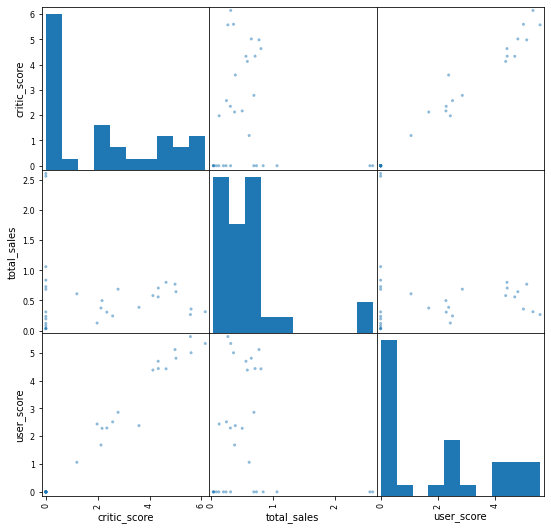

,critic_score,total_sales,user_score
critic_score,1.000000,-0.121552,0.989475
total_sales,-0.121552,1.000000,-0.114252
user_score,0.989475,-0.114252,1.000000


In [23]:
display(efpivot)
efpivot=pd.DataFrame(efpivot)

pd.plotting.scatter_matrix(efpivot, figsize=(9, 9))#muestra matrix de correlacion entre las variables
plt.show()
print()
display(efpivot.corr()) #muestra correlaccion de cada variable con las otras

,platform,na_sales,jp_sales,other_sales,critic_score,user_score
0,Wii,41.36,3.77,8.45,7.6,8.0
1,NES,29.08,6.81,0.77,0.0,0.0
2,Wii,15.68,3.79,3.29,8.2,8.3
3,Wii,15.61,3.28,2.95,8.0,8.0
4,GB,11.27,10.22,1.00,0.0,0.0
...,...,...,...,...,...,...
16710,PS3,0.00,0.01,0.00,0.0,0.0
16711,X360,0.00,0.00,0.00,0.0,0.0
16712,PSV,0.00,0.01,0.00,0.0,0.0
16713,GBA,0.01,0.00,0.00,0.0,0.0


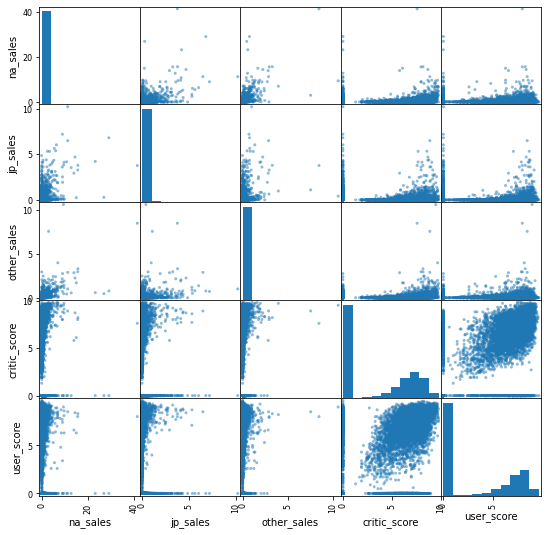

,na_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.449594,0.638649,0.153487,0.139332
jp_sales,0.449594,1.000000,0.291089,-0.043754,-0.032040
other_sales,0.638649,0.291089,1.000000,0.176160,0.165136
critic_score,0.153487,-0.043754,0.176160,1.000000,0.817995
user_score,0.139332,-0.032040,0.165136,0.817995,1.000000


In [24]:
#display(df)
df_inf= df.reindex(['platform', 'na_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score'], axis=1)
display(df_inf)

pd.plotting.scatter_matrix(df_inf, figsize=(9, 9))#muestra matrix de correlacion entre las variables
plt.show()
print()
display(df_inf.corr()) #muestra correlaccion de cada variable con las otras

Se establece las siguientes conclusiones:
- tal como se expresaba anteriormenente entre mayor sean las criticas menores ventas persiben las plataformas.
- Se establece una relacion creciente las criticas profesionales con las criticas de los clientes, esto se entiende que a mas criticas de profesionales mayor criticas de los usuarios se presentan.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [25]:
#display(df)

display("COMPARACION DE PLATAFORMAS VS GENEROS DE JUEGOS EN COMPARACION A LAS VENTAS")
efpivot2 = df.pivot_table(index='platform', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='genre', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values=['total_sales'], #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='sum' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
#efpivot2=efpivot2.sort_values(by=['platform'], ascending = False)
display(efpivot2)


'COMPARACION DE PLATAFORMAS VS GENEROS DE JUEGOS EN COMPARACION A LAS VENTAS'

total_sales                                                     \
genre         Action Adventure Fighting    Misc Platform Puzzle  Racing   
platform                                                                  
2600           29.25      1.70     1.24    3.57    13.26  14.69    2.91   
3DO              NaN      0.06      NaN     NaN      NaN   0.02     NaN   
3DS            58.24      4.92    10.56   10.99    32.53   5.57   14.96   
DC              1.26      2.50     1.83     NaN     2.53    NaN    2.65   
DS            112.58     45.97     7.08  135.64    75.83  82.48   38.00   
GB              7.93     17.15      NaN   13.35    54.91  47.47    4.55   
GBA            55.66     14.63     4.16   36.09    78.21  12.81   18.81   
GC             37.70      5.93    18.43   16.72    28.59   4.69   21.87   
GEN             2.74      0.19     5.89    0.03    15.44    NaN    0.26   
GG               NaN       NaN      NaN     NaN     0.04    NaN     NaN   
N64            29.54      0.45    22.11   11.20    36.10   3.39   40.01   
NES            28.75      4.38     6.54    3.59    95.78  20.99    9.78   
NG               NaN       NaN     1.42     NaN      NaN    NaN     NaN   
PC             31.56     10.02     0.29    8.53     0.46   0.91    4.02   
PCFX             NaN       NaN      NaN     NaN      NaN    NaN     NaN   
PS            127.02     20.93    72.74   44.88    64.22  12.06  103.21   
PS2           272.71     21.24    92.61  101.09    72.54   5.94  156.39   
PS3           301.59     22.31    51.11   46.86    29.80   0.59   72.13   
PS4            96.10      6.34     8.65    8.19     7.69   0.02   12.14   
PSP            64.03     10.67    21.82   13.88    17.07   5.45   34.33   
PSV            17.02      3.84     2.62    4.43     2.56   0.18    2.51   
SAT             0.65      4.16     8.53    1.20     0.76   1.00    2.40   
SCD              NaN       NaN      NaN    0.09     1.50    NaN    0.07   
SNES           10.08      1.50    26.94    5.02    65.65   6.38   13.49   
TG16             NaN      0.14      NaN     NaN      NaN    NaN     NaN   
WS               NaN       NaN      NaN     NaN      NaN    NaN     NaN   
Wii           114.46     17.80    23.39  216.21    88.92  15.33   60.16   
WiiU           19.07      0.17     6.27   12.46    21.53   1.32    7.87   
X360          239.65     14.89    37.32   91.57    11.29   0.87   64.98   
XB             49.27      3.02    13.53    9.49     9.63   0.41   31.38   
XOne           37.31      2.68     2.45    7.43     0.93    NaN    9.79   

                                                           
genre    Role-Playing Shooter Simulation  Sports Strategy  
platform                                                   
2600              NaN   26.47       0.44    3.45      NaN  
3DO               NaN     NaN       0.02     NaN      NaN  
3DS             84.23    1.29      27.45    6.17     2.09  
DC               0.68    0.33       0.52    3.65      NaN  
DS             124.45    7.86     129.98   31.38    14.87  
GB              88.24    1.19       3.55    9.06     8.06  
GBA             64.20    3.56       5.94   16.32     7.46  
GC              13.16   13.61       8.61   25.34     4.28  
GEN              0.27    0.13        NaN    3.21     0.19  
GG                NaN     NaN        NaN     NaN      NaN  
N64              3.35   19.26      10.18   32.75    10.34  
NES             18.78   35.62        NaN   26.84      NaN  
NG                NaN     NaN        NaN    0.02      NaN  
PC              47.67   45.78      52.51   11.97    45.80  
PCFX             0.03     NaN        NaN     NaN      NaN  
PS              78.40   39.33      25.34  120.95    21.78  
PS2             93.55  108.49      42.65  273.48    15.08  
PS3             73.71  192.54      10.38  133.78     4.85  
PS4             28.99   88.56       1.23   55.61     0.62  
PSP             48.90   19.63       6.24   41.56    10.47  
PSV             12.41    3.88       0.08    4.19     0.35  
SAT              3

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? 

<AxesSubplot:title={'center':'COMPARACION DE PLATAFORMAS VS GENEROS DE JUEGOS EN COMPARACION A LAS VENTAS'}, xlabel='Plataformas de videojuegos', ylabel="Ventas 'mdd'">

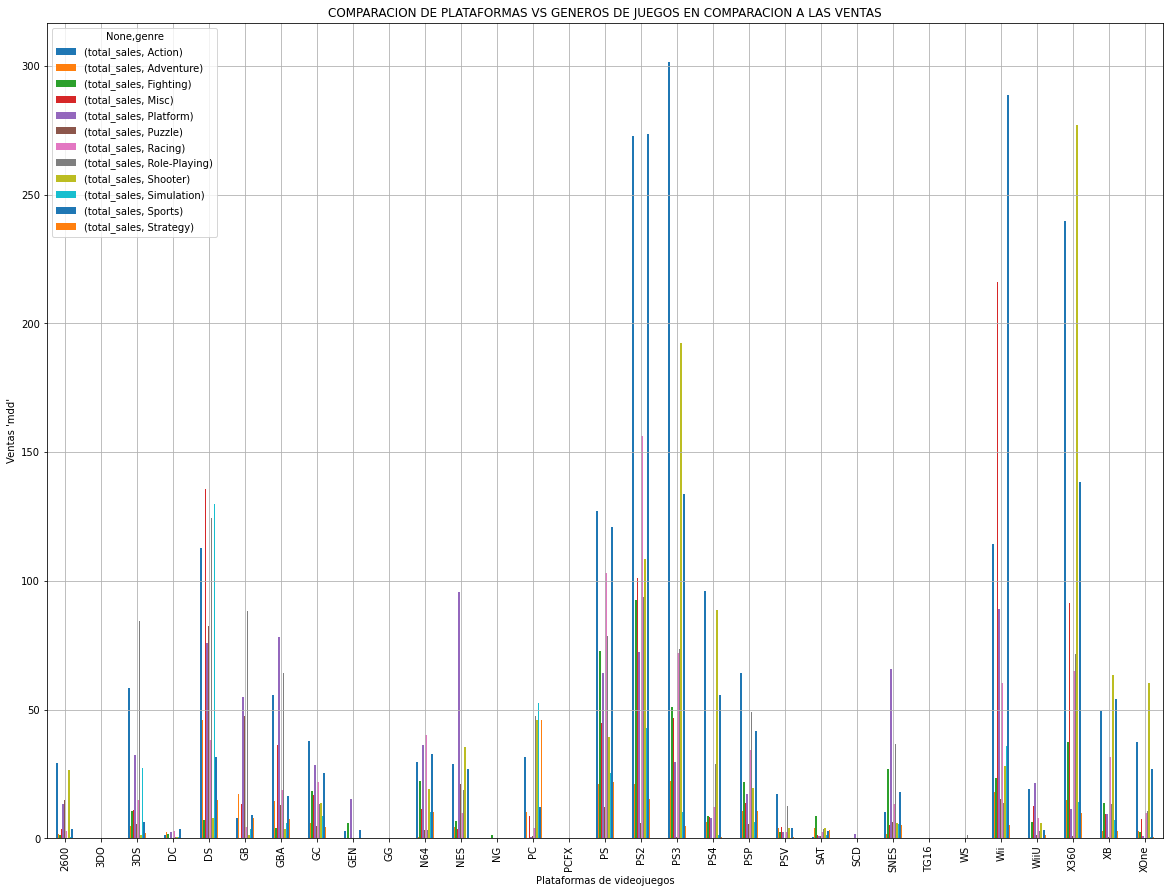

In [26]:

efpivot2.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='COMPARACION DE PLATAFORMAS VS GENEROS DE JUEGOS EN COMPARACION A LAS VENTAS', # se define el titulo del grafico
        kind='bar', #marker='o',      # se define el estilo del grafico
        xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
        ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[20, 15] ,
        legend=True #Sin leyenda.# se define tamaño de la grafica
)

Se puede establecer que siguen durante el tiempo determinado, 6 plataformas tienen los mejores resultados en las diferentes generos de videojuegos.
Se establece que el primero genero más rentable es el genero de accion
el siguiente es el genero es el de deportes.
y por ultimo el genero de shooter.

### ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Se puede establecer en el analisis realizado en primera medida de las plataformas que tuvieron un buen desempeño en ventas se puede tambien realizar y concluir con los generos los cuales tambien 

,total_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


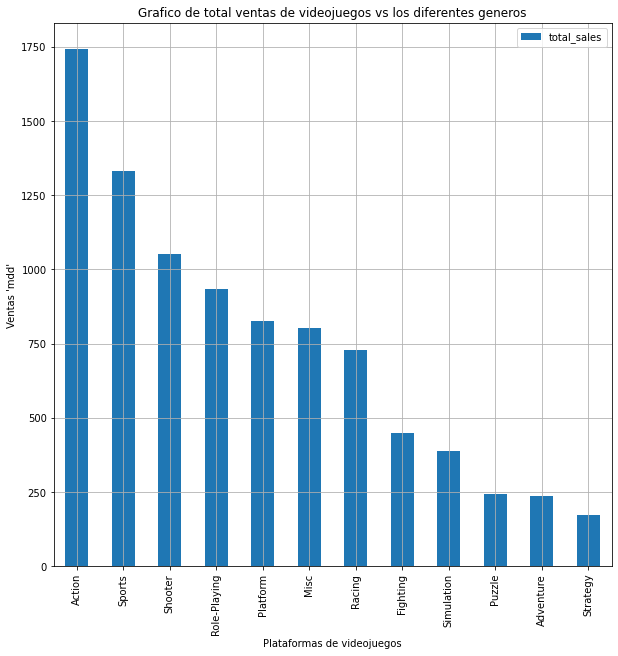

In [27]:
eg2=df.groupby(by=["genre"])['total_sales'].sum()
eg2=pd.DataFrame(eg2)
eg2=eg2.sort_values(by=['total_sales'], ascending = False)
display(eg2)
print()
eg2.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='Grafico de total ventas de videojuegos vs los diferentes generos', # se define el titulo del grafico
        kind='bar',      # se define el estilo del grafico
        xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
        ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[10, 10]          # se define tamaño de la grafica
)
plt.show()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,0.0,0.0,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,RP,0.01


genre,Action,Misc,Platform,Role-Playing,Shooter,Sports
year_of_release,,,,,,
1970,27.65,12.22,2.22,3.48,11.09,21.60
1980,0.34,2.70,NaN,NaN,7.07,0.50
1981,14.79,NaN,6.92,NaN,10.02,0.78
1982,6.50,0.87,5.03,NaN,3.81,1.06
1983,2.86,2.14,6.93,NaN,0.49,3.20
1984,1.85,1.45,0.69,NaN,31.10,6.17
1985,3.52,NaN,43.17,NaN,1.00,1.96
1986,13.74,NaN,9.39,2.52,3.89,5.58
1987,1.11,NaN,1.74,4.65,0.69,3.71


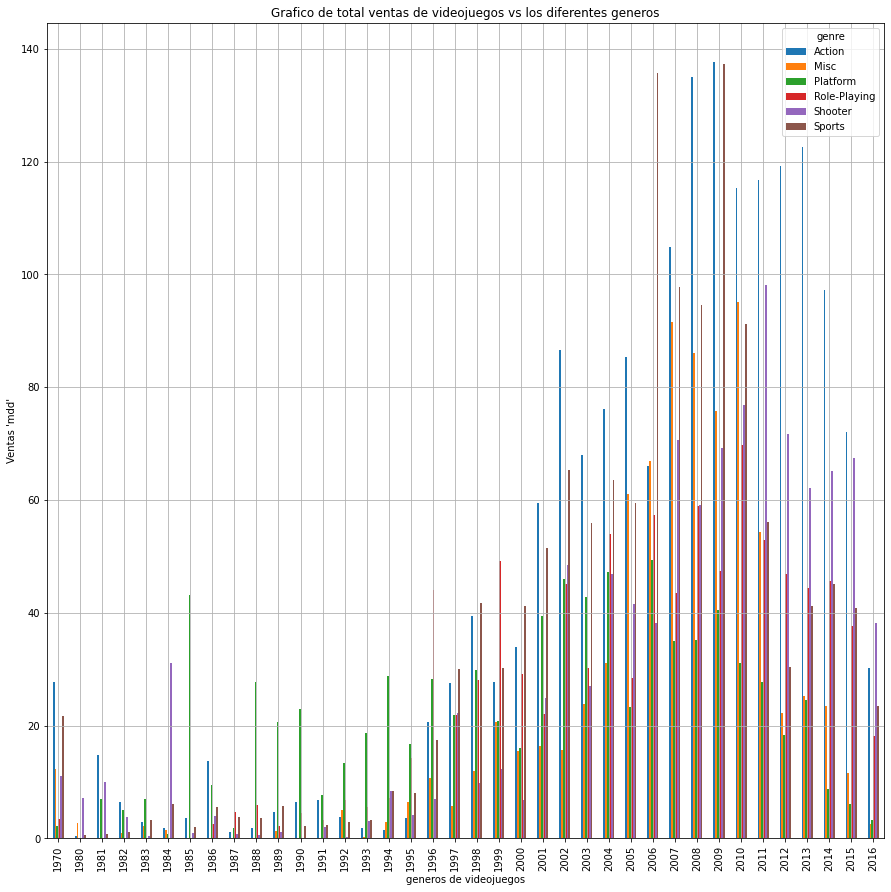

In [28]:
eg3= df[(df['genre'].isin(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc']))]
display(eg3)

pivot_dataeg2 = eg3.pivot_table(index='year_of_release', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='genre', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='total_sales', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='sum' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
display(pivot_dataeg2)

pivot_dataeg2.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='Grafico de total ventas de videojuegos vs los diferentes generos', # se define el titulo del grafico
        kind='bar', #marker='o',      # se define el estilo del grafico
        xlabel="generos de videojuegos",   # se define leyenda del eje x esta es una opcion
        ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[15, 15] ,
        legend=True #Sin leyenda.# se define tamaño de la grafica
)
plt.show()

Se evidencia que los datos de los generos tienen un mismo comportamiento de datos de las plataformas en cuanto a su rentabilidad, solo pocos generos se detacan por tener el mayor participacion.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas de box-plots para analizar ventas de las plataformas que más venden, scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas, gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>

[Volver a Contenidos](#back)

# <a id='data_preprocessing3'></a>
## Paso 4. Creación de un perfil de usuario para cada región

Crea un perfil de usuario para cada región: Para cada región (NA, UE, JP) determina:

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [29]:
#display(df)
df_na = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'na_sales'], axis=1)
#display(df_na)
df_naagrupado=df_na.groupby(by=["platform"])['na_sales'].sum()
df_naagrupado=pd.DataFrame(df_naagrupado)
df_naagrupado=df_naagrupado.sort_values(by=['na_sales'], ascending = False)
#display(df_naagrupado)
#df_naagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en NA de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)
print()

In [30]:
#display(df)
df_eu = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'eu_sales'], axis=1)
#display(df_ue)
df_euagrupado=df_eu.groupby(by=["platform"])['eu_sales'].sum()
df_euagrupado=pd.DataFrame(df_euagrupado)
df_euagrupado=df_euagrupado.sort_values(by=['eu_sales'], ascending = False)
#display(df_ueagrupado)
#df_euagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en EU de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)
print()

In [31]:
#display(df)
df_jp = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'jp_sales'], axis=1)
#display(df_ue)
df_jpagrupado=df_jp.groupby(by=["platform"])['jp_sales'].sum()
df_jpagrupado=pd.DataFrame(df_jpagrupado)
df_jpagrupado=df_jpagrupado.sort_values(by=['jp_sales'], ascending = False)
#display(df_ueagrupado)
#df_jpagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en JP de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)
print()

In [32]:
#display(df)
df_other = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'other_sales'], axis=1)
#display(df_ue)
df_otheragrupado=df_other.groupby(by=["platform"])['other_sales'].sum()
df_otheragrupado=pd.DataFrame(df_otheragrupado)
df_otheragrupado=df_otheragrupado.sort_values(by=['other_sales'], ascending = False)
#display(df_ueagrupado)
#df_otheragrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en other_sales de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)
print()

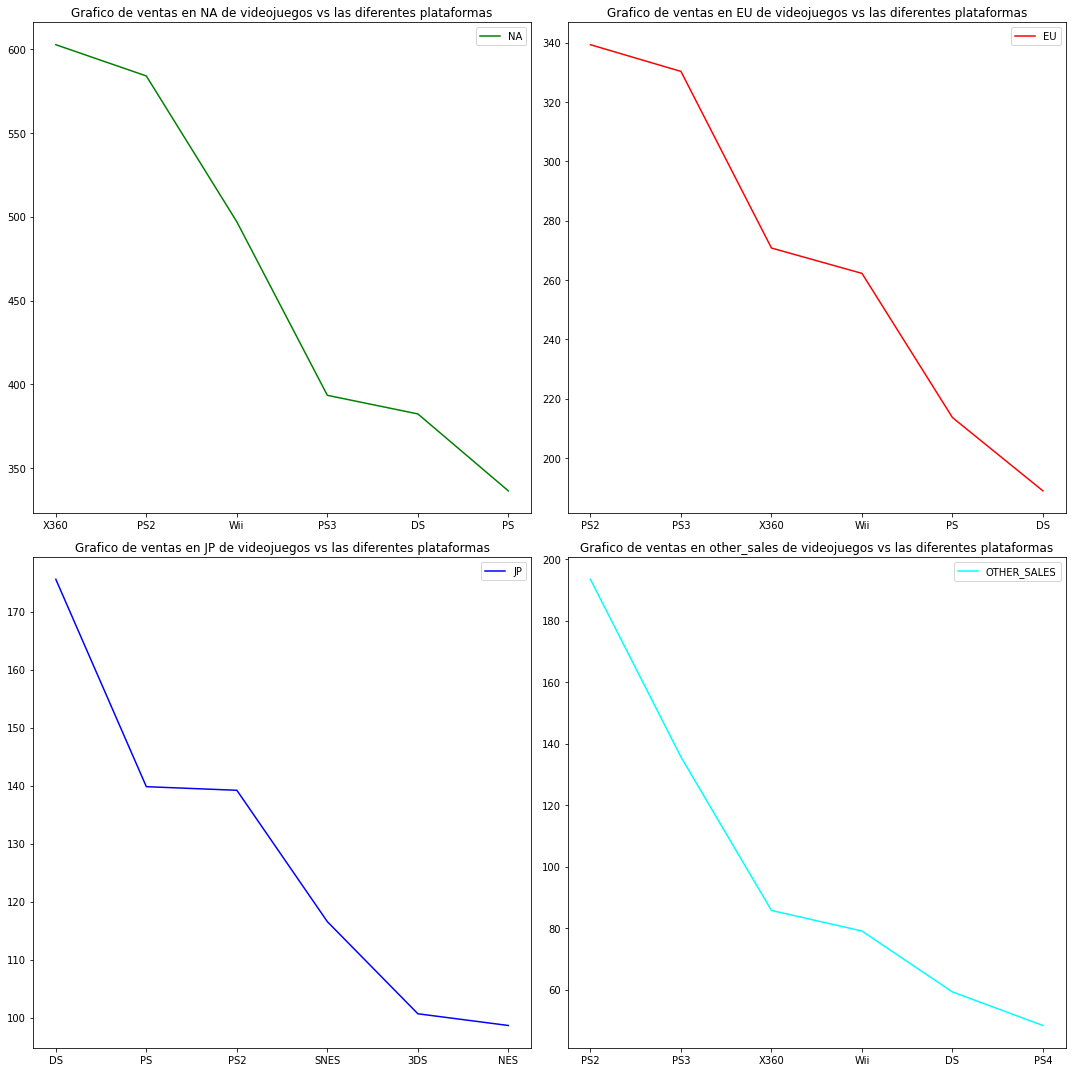

In [33]:

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Grafico de ventas en NA de videojuegos vs las diferentes plataformas')
plt.plot(df_naagrupado.head(6), label='NA', color='green')
plt.legend()

plt.subplot(222)
plt.title('Grafico de ventas en EU de videojuegos vs las diferentes plataformas')
plt.plot(df_euagrupado.head(6), label='EU', color='red')
plt.legend()

plt.subplot(223)
plt.title('Grafico de ventas en JP de videojuegos vs las diferentes plataformas')
plt.plot(df_jpagrupado.head(6), label='JP', color='blue')
plt.legend()

plt.subplot(224)
plt.title('Grafico de ventas en other_sales de videojuegos vs las diferentes plataformas')
plt.plot(df_otheragrupado.head(6), label='OTHER_SALES', color='cyan')
plt.legend()

plt.tight_layout()
plt.show()

Se establece una diferencia grande entre los diferentes mercados tal como se muestran en las graficas:
1. Se realiza un zoom tomando las 6 primeros plataformas que encabezan las mayores ventas
2. Se establece que en NA tiene una mejor venta que los demas mercados.
3. Al realizar la comparacion entre las ventas de NA y EU son las mismas plataformas pero en diferente orden.
4. En las ventas de JP se destaca que las 3 primeras estan en los mercados de NA y Eu, pero aparecen 3 plataformas apartes de las que se presentaban en esos mercados.
5. Al comparar las ventas de NA, EU contra otras ventas se establece que el top 5 son las mismas plataformas que las de los otras ventas.

### Los cinco géneros principales. Explica la diferencia.

In [34]:
#_________________________________________________________NA

#display(df)
df_na2 = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'na_sales'], axis=1)
#display(df_na2)
df_naagrupado2=df_na2.groupby(by=["genre"])['na_sales'].sum()
df_naagrupado2=pd.DataFrame(df_naagrupado2)
df_naagrupado2=df_naagrupado2.sort_values(by=['na_sales'], ascending = False)
#display(df_naagrupado)
#df_naagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en NA de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)


#_________________________________________________________EU

#display(df)
df_eu2 = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'eu_sales'], axis=1)
#display(df_ue)
df_euagrupado2=df_eu2.groupby(by=["genre"])['eu_sales'].sum()
df_euagrupado2=pd.DataFrame(df_euagrupado2)
df_euagrupado2=df_euagrupado2.sort_values(by=['eu_sales'], ascending = False)
#display(df_ueagrupado)
#df_euagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en EU de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)


#_________________________________________________________JP

#display(df)
df_jp2 = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'jp_sales'], axis=1)
#display(df_ue)
df_jpagrupado2=df_jp2.groupby(by=["genre"])['jp_sales'].sum()
df_jpagrupado2=pd.DataFrame(df_jpagrupado2)
df_jpagrupado2=df_jpagrupado2.sort_values(by=['jp_sales'], ascending = False)
#display(df_ueagrupado)
#df_jpagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en JP de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)


#_________________________________________________________OTHER


#display(df)
df_other2 = df.reindex(['name', 'platform', 'year_of_release', 'genre', 'other_sales'], axis=1)
#display(df_ue)
df_otheragrupado2=df_other2.groupby(by=["genre"])['other_sales'].sum()
df_otheragrupado2=pd.DataFrame(df_otheragrupado2)
df_otheragrupado2=df_otheragrupado2.sort_values(by=['other_sales'], ascending = False)
#display(df_ueagrupado)
#df_otheragrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en other_sales de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)


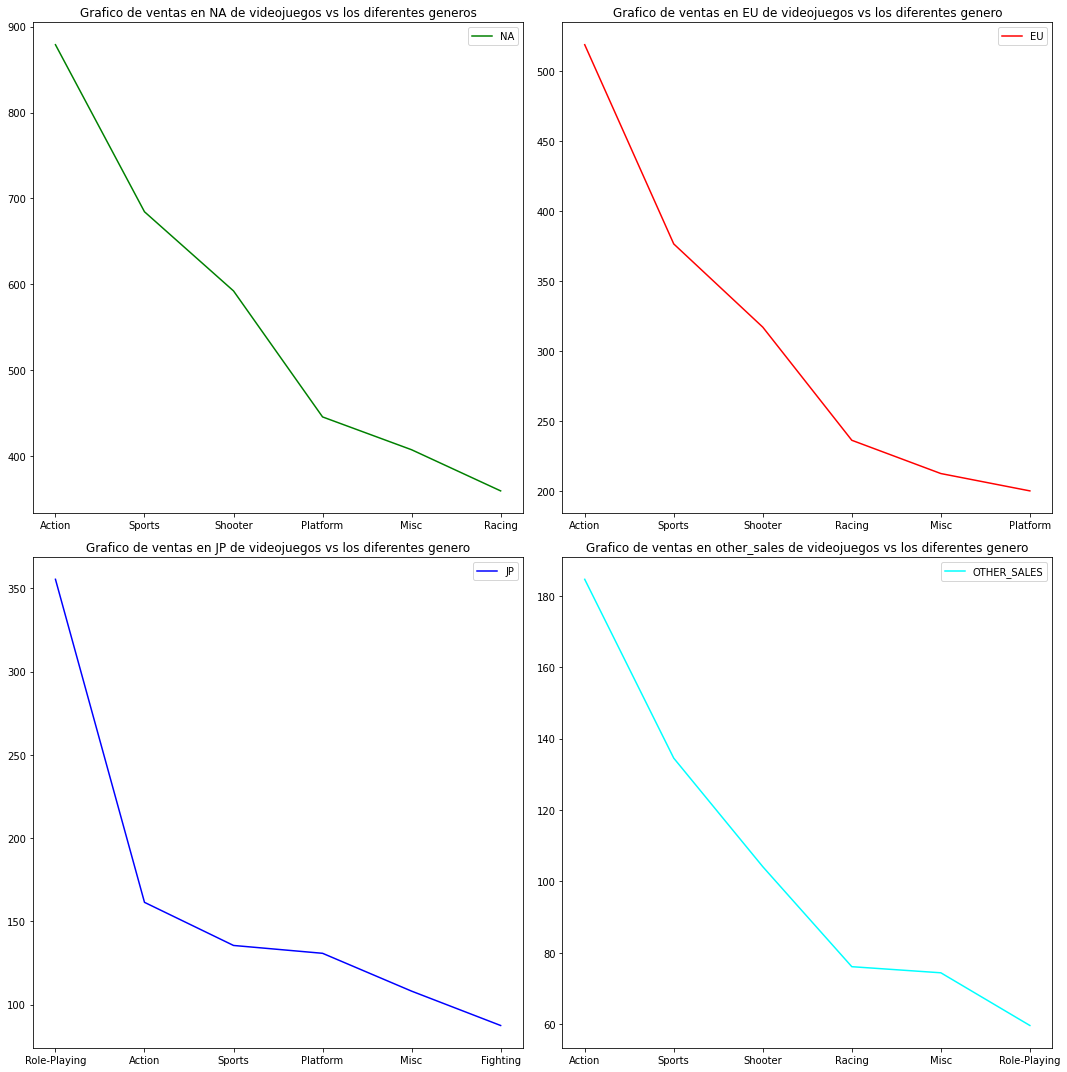

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Grafico de ventas en NA de videojuegos vs los diferentes generos')
plt.plot(df_naagrupado2.head(6), label='NA', color='green')
plt.legend()

plt.subplot(222)
plt.title('Grafico de ventas en EU de videojuegos vs los diferentes genero')
plt.plot(df_euagrupado2.head(6), label='EU', color='red')
plt.legend()

plt.subplot(223)
plt.title('Grafico de ventas en JP de videojuegos vs los diferentes genero')
plt.plot(df_jpagrupado2.head(6), label='JP', color='blue')
plt.legend()

plt.subplot(224)
plt.title('Grafico de ventas en other_sales de videojuegos vs los diferentes genero')
plt.plot(df_otheragrupado2.head(6), label='OTHER_SALES', color='cyan')
plt.legend()

plt.tight_layout()
plt.show()

Se establece una diferencia grande entre los diferentes mercados tal como se muestran en las graficas:
1. Se realiza un zoom tomando los 6 primeros generos que encabezan las mayores ventas
2. Se establece que en NA tiene una mejor venta que los demas mercados.
3. Al realizar la comparacion entre las ventas de NA y EU son los mismos generos solo que cambian de orden 2 de estos generos.
4. En las ventas de JP se destaca que hay dos generos que no aparecen en los dos primeros mercados:  "role_playing" y Fighting", los demas generos son los mismos excepto Shooter and Racing.
5. Al comparar las ventas de NA, EU contra otras ventas se establece que el top 5 son los mismo generos que las de los otras ventas. Lo que cambia es el genero de Role-Playing que se incluye y sale el genero Platform.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [36]:
#_________________________________________________________NA

#display(df)
df_na3 = df.reindex(['name', 'platform', 'year_of_release', 'rating', 'na_sales'], axis=1)
#display(df_na3)
df_naagrupado3=df_na3.groupby(by=["rating"])['na_sales'].sum()
df_naagrupado3=pd.DataFrame(df_naagrupado3)
df_naagrupado3=df_naagrupado3.sort_values(by=['na_sales'], ascending = False)
#display(df_naagrupado)
#df_naagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en NA de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)


#_________________________________________________________EU

#display(df)
df_eu3 = df.reindex(['name', 'platform', 'year_of_release', 'rating', 'eu_sales'], axis=1)
#display(df_eu3)
df_euagrupado3=df_eu3.groupby(by=["rating"])['eu_sales'].sum()
df_euagrupado3=pd.DataFrame(df_euagrupado3)
df_euagrupado3=df_euagrupado3.sort_values(by=['eu_sales'], ascending = False)
#display(df_ueagrupado)
#df_euagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en EU de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)


#_________________________________________________________JP

#display(df)
df_jp3 = df.reindex(['name', 'platform', 'year_of_release', 'rating', 'jp_sales'], axis=1)
#display(df_ue)
df_jpagrupado3=df_jp3.groupby(by=["rating"])['jp_sales'].sum()
df_jpagrupado3=pd.DataFrame(df_jpagrupado3)
df_jpagrupado3=df_jpagrupado3.sort_values(by=['jp_sales'], ascending = False)
#display(df_ueagrupado)
#df_jpagrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en JP de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)


#_________________________________________________________OTHER


#display(df)
df_other3 = df.reindex(['name', 'platform', 'year_of_release', 'rating', 'other_sales'], axis=1)
#display(df_ue)
df_otheragrupado3=df_other3.groupby(by=["rating"])['other_sales'].sum()
df_otheragrupado3=pd.DataFrame(df_otheragrupado3)
df_otheragrupado3=df_otheragrupado3.sort_values(by=['other_sales'], ascending = False)
#display(df_ueagrupado)
#df_otheragrupado.plot(        #plot(): método de pandas que prepara la imagen con los datos.
 #       title='Grafico de ventas en other_sales de videojuegos vs las diferentes plataformas', # se define el titulo del grafico
  #      kind='bar',      # se define el estilo del grafico
   #     xlabel="Plataformas de videojuegos",   # se define leyenda del eje x esta es una opcion
    #    ylabel="Ventas 'mdd'",   # se define leyenda del eje y esta es una opcion
     #   grid=True,               # se define cuadricula
      #  figsize=[10, 10]          # se define tamaño de la grafica
#)

#'E - todos' - # 'unknown'  - # 'M- maduro +17'  # 'T todos a partir de 13 años o mas' # 'E10+ - todos a partir de 10 años' 
# 'K-A' # 'AO - adultos solo +18'  # 'EC - de 5 años para abajo' # 'RP - clasificacion pendiente']

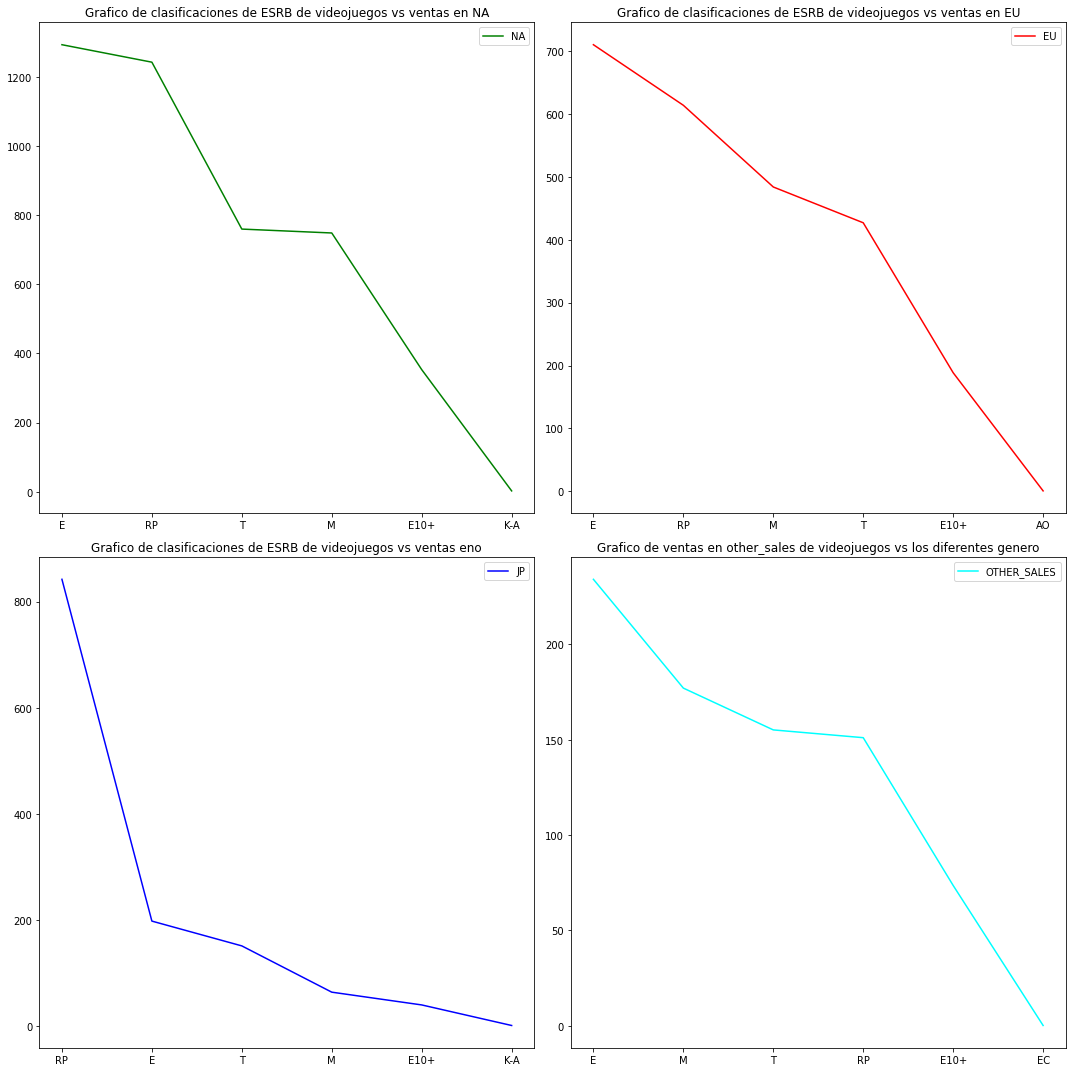

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title('Grafico de clasificaciones de ESRB de videojuegos vs ventas en NA')
plt.plot(df_naagrupado3.head(6), label='NA', color='green')
plt.legend()

plt.subplot(222)
plt.title('Grafico de clasificaciones de ESRB de videojuegos vs ventas en EU')
plt.plot(df_euagrupado3.head(6), label='EU', color='red')
plt.legend()

plt.subplot(223)
plt.title('Grafico de clasificaciones de ESRB de videojuegos vs ventas eno')
plt.plot(df_jpagrupado3.head(6), label='JP', color='blue')
plt.legend()

plt.subplot(224)
plt.title('Grafico de ventas en other_sales de videojuegos vs los diferentes genero')
plt.plot(df_otheragrupado3.head(6), label='OTHER_SALES', color='cyan')
plt.legend()

plt.tight_layout()
plt.show()

Se establece una diferencia grande entre los diferentes mercados tal como se muestran en las graficas:
1. Se realiza un zoom tomando las 6 primeras clasificaciones dependiendo  del mercado.
2. se verifica y la particiapacion de RP (clasificacion pendiente) es considerable en las diferentes regiones, esto se puede determinar o a una toma  incorrecta de los datos.
3. se determina que en 3 de los 4 sectores prima la clasificacion E (todos), videojuegos aptos para todo publico y de una franja de edad bastante amplia.
2. Se establece que en NA tiene una mejor venta que los demas mercados en las diferentes clasificaciones de videojuegos, teniendo presente que el 2  son juegos RP (clasificacion pendiente) .
3. Al realizar la comparacion entre las ventas de NA y JP alternan los dos primeras clasificaciones pero el resto continua igual.
4. Deacuerdo a las clasificaciones de ESRB estos si afectan ya que estuvo enfocado a publico de rango de teen hasta los 17+.

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

[Volver a Contenidos](#back)

# <a id='hypothesis'></a>
## Paso 5. Prueba de hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estra pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    Se realiza la prueba de Levene cetrada en la media, y se establece que la media de ambas no son iguales 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [38]:
#display(df)
df_hxone1 = df.reindex(['platform', 'user_score'], axis=1)
df_hxone2= df_hxone1[df_hxone1['platform']=="XOne"]
df_hxone3 = df_hxone2.reindex(['user_score'], axis=1)
df_hxone4=pd.DataFrame(df_hxone3)
#display(df_hxone)

df_hpc1 = df.reindex(['platform', 'user_score'], axis=1)
df_hpc2= df_hpc1[df_hpc1['platform']=="PC"]
df_hpc3 = df_hpc2.reindex(['user_score'], axis=1)
df_hpc4=pd.DataFrame(df_hpc3)
#display(df_hpc)


alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis



In [43]:
import scipy.stats as stats
print()
print('Prueba de Levene centrada en la media')
print()

# Prueba de Levene centrada en la media

pruebalevele= stats.levene(df_hxone2['user_score'], df_hpc2['user_score'], center='mean')

print('valor p: ', pruebalevele.pvalue) # extraer el valor p

if pruebalevele.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula: Las varianzas de las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes")
    


Prueba de Levene centrada en la media

valor p:  0.7820101475361664
No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes


In [40]:
print()
print('prueba de ttest')
print()

results = st.ttest_ind(df_hxone3, df_hpc3) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")
else:
    print("No podemos rechazar la hipótesis nula")


prueba de ttest

valor p:  [0.00058334]
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


En nuestro caso las calificaciones de los usuarions promedio para las dos plataformas son las mismas, por lo que rechazamos la hipótesis nula. Esto significa que hay evidencia suficiente para concluir que el promedio de calificacion de los usuarios para estas plataformas son diferentes.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [41]:
#display(df)
df_haccion = df.reindex(['genre', 'user_score'], axis=1)
df_haccion= df_haccion[df_haccion['genre']=="Action"]
df_haccion = df_haccion.reindex(['user_score'], axis=1)
#display(df_hxone)

df_hsport = df.reindex(['genre', 'user_score'], axis=1)
df_hsport= df_hsport[df_hsport['genre']=="Sports"]
df_hsport = df_hsport.reindex(['user_score'], axis=1)
#display(df_hpc)

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results2 = st.ttest_ind(df_haccion, df_hsport) # realizar una prueba

print('valor p: ', results2.pvalue) # extraer el valor p

if results2.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")

valor p:  [1.19440138e-08]
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


En nuestro caso las calificaciones de los usuarions promedio para los dos generos son diferentes, por lo que rechazamos la hipótesis nula. Esto significa que hay evidencia suficiente para concluir que el promedio de calificacion de los usuarios para estos generos son diferentes.

### Establece tu mismo el valor de umbral alfa. Explica: Cómo formulaste las hipótesis nula y alternativa.

Se establece un umbral alfa del 5% , El nivel de significación (alfa, α) es la probabilidad de cometer un error de Tipo I,  lo que significa que se acepta un 5% de probabilidad de estar equivocado al rechazar la hipótesis nula.

En ambos casos se establece las hipotesis de la siguiente manera:
- En el primer caso se requiere una comparacion de dos muestras las cuales son las plataformas de vodeojuegos que tienen unas calificaciones especificas de usuarios y se requiere establecer si son iguales (lo cual es la Hipotesis nula,      HXbox One = HPC y la hipotesis alternativa es lo opuesto que no sean iguales HXbox One ≠  HPC.

- Para el segundo caso se requiere una comparacion de dos muestras las cuales son los generos de videojuegos que tienen unas calificaciones especificas de usuarios y se requiere establecer si son diferentes (lo cual es la Hipotesis alternativa, HXbox One ≠ HPC y la hipotesis nula es lo opuesto que sean iguales HXbox One = HPC.

### ¿Qué criterio utilizaste para probar las hipótesis y por qué?

Se establece la Hipótesis sobre la igualdad de las medias de dos poblaciones debido a que nos permite emplear para si la variabilidad de una población difiere de otra. Además permite mostrar una estadística para comparar las medias de dos o más poblaciones, mediante la técnica conocida como Análisis de Varianza.

[Volver a Contenidos](#back)

 <a id='end'></a>
## Paso 6. Conclusión general
Paso 6. Escribe una conclusión general

Al realizar el analisis de los datos se puede concluir lo siguiente:

1. Se presentan muchos datos ausentes que genera una distorción pero su tamaño no es representativo y teniendo presente esto se realizan los analsisi respectivos.

2. Se realiza un ajuste a las variables para establecer los analisis de los datos y poder establecer comportamientos.

3. Se evidencia que el comportamiento de los videojuegos tiene un crecimiento alto desde los años 1996 hacia adelante, en donde se puede concluir que esta asociado a la globalizacion de la información y la conectabilidad de los datos a nivel mundial.

4. Se establece la variabilidad y moda del consumidor, el cual evidencia crecimiento momentaneo de un videojuego y posteriormente su declive y nuevamente el surgimiento de otro y esto esta asociado tambien a la cantidad de lanzamientos de videojuegos que se presentan en estos años que comparados con los años 80, suben de forma excesiva.

5. Relación de crecimiento, lanzamiento y ventas, estos 3 factores se evidencia que aumentaron directamente proporcional una a la otra, en donde a mayor crecimiento, mayor lanzamiento de videojuegos y por consiguiente una mayor venta.

6. Se establece unas plataformas top que desde los años 1990 en adelante se destacan en ventas pero tiene un comportamiento estacional, que implica lanzamiento de videojuegos, altos ingresos de ventas pero posteriormente una disminucion y ya no una acogida del usuario al videojuego, en donde se establece que este ciclo se presenta de una plataforma a otra.

7. Al comparar las ventas entre las diferentes plataformas estas presenta comportamiento de ventas medias, en donde el 50% de los datos se presentan en casi todas las plataformas de forma similar (digrama de cajas o bigotes), pero sus diferencias son esos compartamientos altos en ventas inusuales que varian de una plataforma a otra.

8. Otra conclusión que se extrae es una relacion inversamente entre las reseñas y las ventas, en dondea mayores criticas que reciben los videojuegos de profesionales y clientes menores ventas persiven las plataformas.

9. Se realiza y establece tambien un analsis a los generos de videojuegos, afirmando lo siguiente se identifican los generos preferidos por los clientes y a que publico esta dirigido.

10. Se establece el comportamiento de los generos los cuales tienen un mismo comportamiento que las plataformas que a medida que un genero se destaca en un momento determinado, este alcanza su pico de ventas y posteriormente este disminuye y nuevamente arranca otro y esto va de la mano con las ventas.

11. Por ultimo al comparar los mercados y al hacer un zoom de los datos se pueden establecer patrones similares de comportamiento, en donde permite establecer gustos de la población, a quienes estan enfocados y con esta informacion la compañia puede tomar información para establecer estrategias y planes con el fin de maximizar ventas, estos parametros son:

    - Se establece el genero predilecto por los usuarios y cuales videojuegos fueron, para realizar un benchmarking y
    mejorar sobre estos.

    - Establecer que requisitos y calificaciones recibieron por reseñas profesionales y de usuarios, los cuales sirven como 
    input de entrada para la compañia para mejorar los videojuegos.
    
    - Permite establecer un panorama de mercado objetivo al puede estar dirigido los videojuegos de acuerdo a la 
    clasificacion de ESRB y asi poder maximizar ventas y acogida por los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>

[Volver a Contenidos](#back)